# 🛍️ Análise de Vendas de uma Loja

Este projeto tem como objetivo realizar uma análise exploratória de dados de vendas de uma loja fictícia. A partir dos dados, vamos buscar responder perguntas de negócio, identificar padrões, oportunidades e gerar insights que ajudem na tomada de decisão.

---


## 🔧 Importação das bibliotecas


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('dark')


## 📥 Carregamento dos dados


In [49]:
df = pd.read_csv('vendas_loja.csv')

# Visualizando as primeiras linhas
df.head()


,Data,Produto,Categoria,Valor Unitário,Quantidade,Forma de Pagamento,Cidade,Vendedor
0,2025-05-27,Jaqueta,Vestuário,378.18,2,Cartão de Crédito,São Paulo,Rafael
1,2025-02-27,Calça Jeans,Vestuário,344.15,4,Pix,Brasília,Carlos
2,2024-07-12,Calça Jeans,Vestuário,268.97,3,Dinheiro,Rio de Janeiro,Rafael
3,2024-09-30,Tênis,Calçados,412.44,3,Cartão de Crédito,Porto Alegre,Rafael
4,2025-05-24,Vestido,Vestuário,127.40,4,Pix,São Paulo,Rafael


## 🔍 Análise Exploratória dos Dados (EDA)

Vamos entender como estão distribuídos os dados e obter as primeiras informações.


In [50]:
# Verificando informações gerais
df.info()

# Estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                300 non-null    object 
 1   Produto             300 non-null    object 
 2   Categoria           300 non-null    object 
 3   Valor Unitário      300 non-null    float64
 4   Quantidade          300 non-null    int64  
 5   Forma de Pagamento  300 non-null    object 
 6   Cidade              300 non-null    object 
 7   Vendedor            300 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 18.9+ KB


,Valor Unitário,Quantidade
count,300.00000,300.000000
mean,257.46450,3.026667
std,143.24532,1.343617
min,20.11000,1.000000
25%,131.17500,2.000000
50%,248.89000,3.000000
75%,388.94000,4.000000
max,499.57000,5.000000


## 💰 Faturamento Total da Loja

Vamos calcular o faturamento total da loja considerando o valor unitário e a quantidade vendida.


In [51]:
# Criar coluna de faturamento
df['Total'] = df['Valor Unitário'] * df['Quantidade']

# Faturamento total
faturamento_total = df['Total'].sum()
print(f'Faturamento Total: R$ {faturamento_total:,.2f}')


Faturamento Total: R$ 227,561.96


## 🏆 Produtos Mais Vendidos

Analisaremos os produtos mais vendidos em termos de quantidade e faturamento.


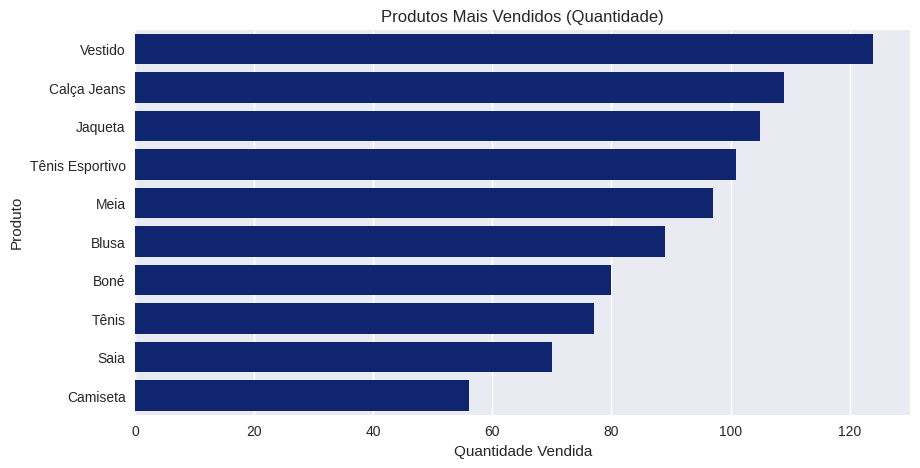

In [52]:
# Por quantidade
quantidade_produtos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# Por faturamento
faturamento_produtos = df.groupby('Produto')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=quantidade_produtos.values, y=quantidade_produtos.index)
plt.title('Produtos Mais Vendidos (Quantidade)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()


## 📊 Faturamento por Categoria


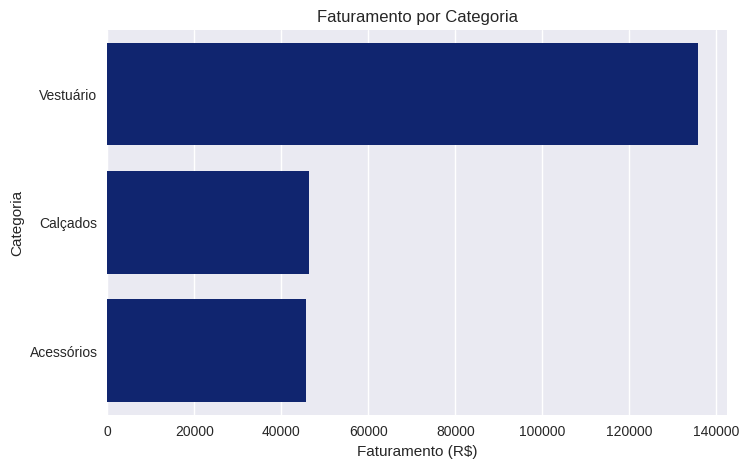

In [53]:
faturamento_categoria = df.groupby('Categoria')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=faturamento_categoria.values, y=faturamento_categoria.index)
plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Categoria')
plt.show()


## 🌍 Faturamento por Cidade


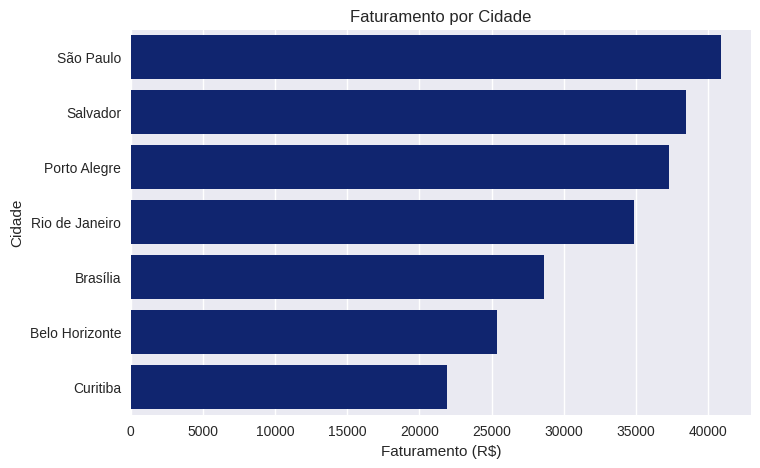

In [54]:
faturamento_cidade = df.groupby('Cidade')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=faturamento_cidade.values, y=faturamento_cidade.index)
plt.title('Faturamento por Cidade')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Cidade')
plt.show()


## 💳 Forma de Pagamento Mais Usada


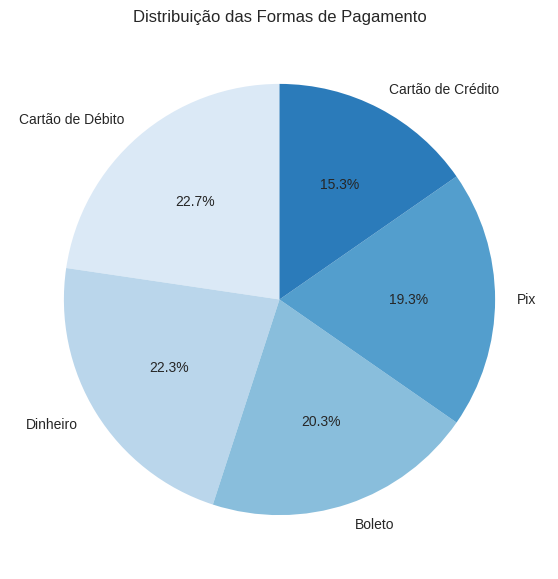

In [55]:
formas_pagamento = df['Forma de Pagamento'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(formas_pagamento.values, labels=formas_pagamento.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Distribuição das Formas de Pagamento')
plt.show()


## 📅 Faturamento ao Longo do Tempo

Analisaremos o comportamento das vendas ao longo do tempo.


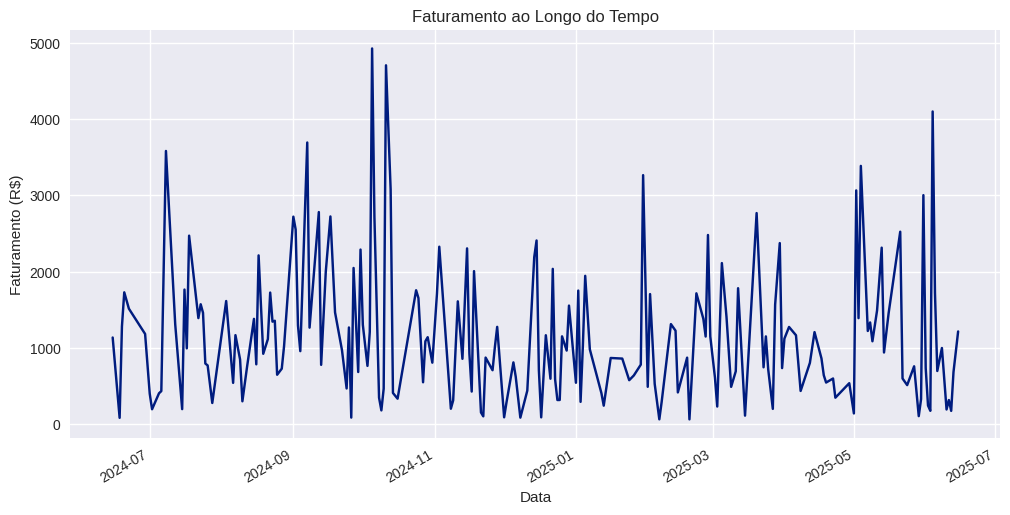

In [56]:
# Converter data
df['Data'] = pd.to_datetime(df['Data'])

# Agrupar por data
faturamento_diario = df.groupby('Data')['Total'].sum()

plt.figure(figsize=(12,6))
faturamento_diario.plot()
plt.title('Faturamento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Faturamento (R$)')
plt.show()


## 👥 Desempenho dos Vendedores

Vamos analisar qual vendedor gerou mais faturamento.


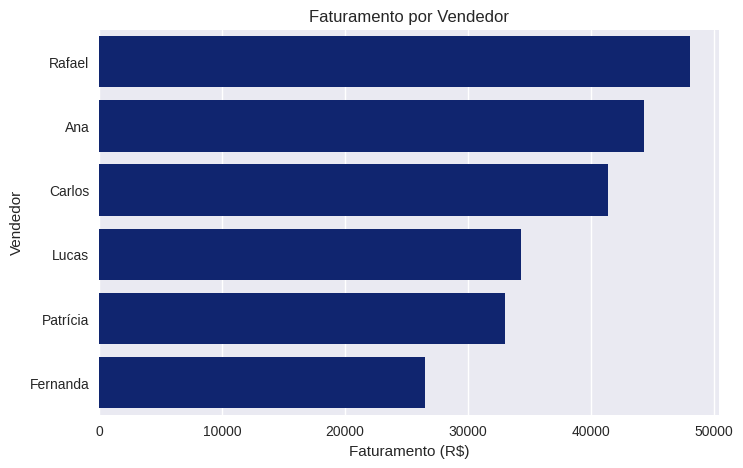

In [57]:
faturamento_vendedor = df.groupby('Vendedor')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=faturamento_vendedor.values, y=faturamento_vendedor.index)
plt.title('Faturamento por Vendedor')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Vendedor')
plt.show()


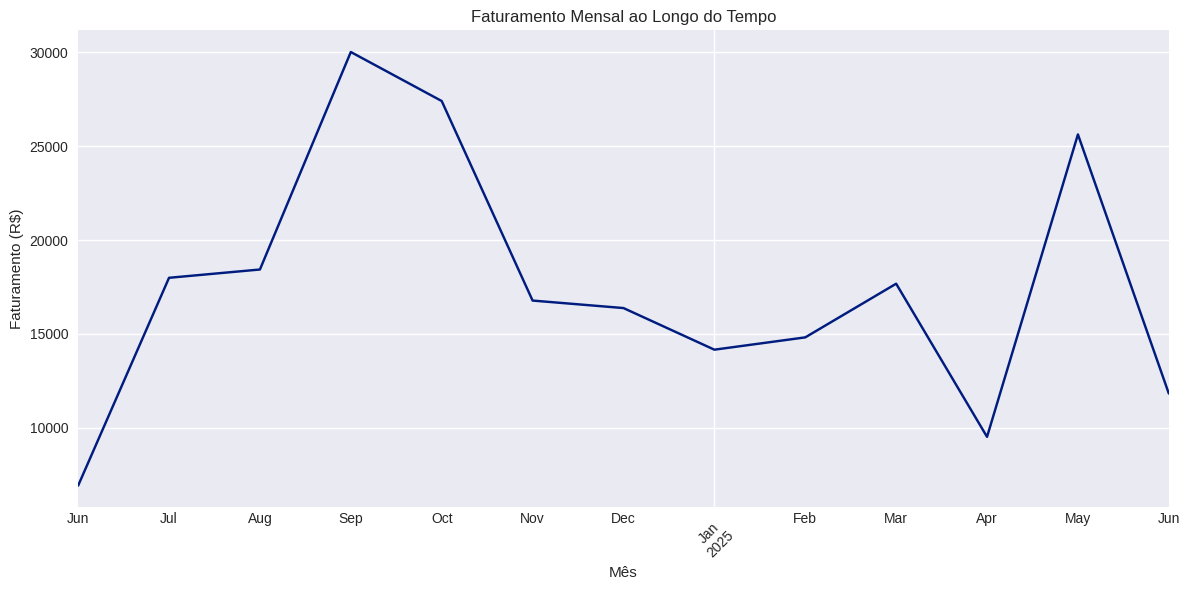

<ipython-input-58-1936852860>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faturamento_dia_semana = df.groupby('Dia da Semana')['Total'].sum().reindex(dias_ordenados)


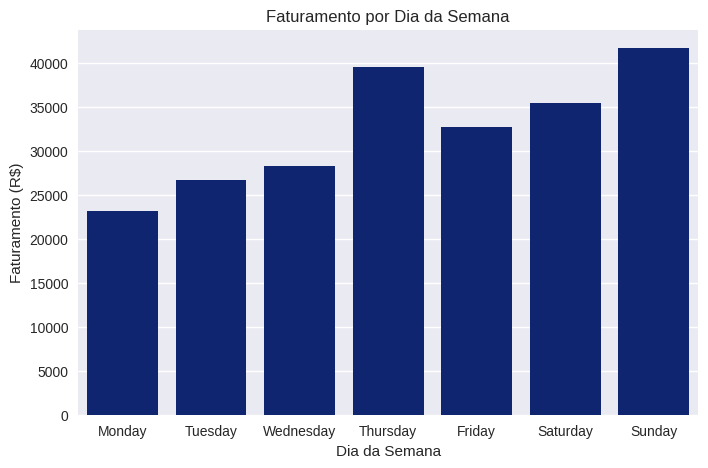

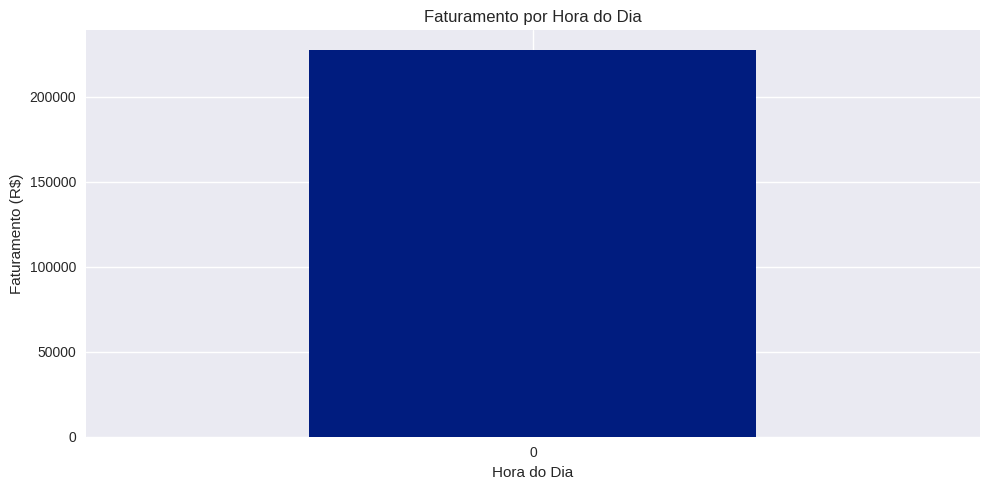

In [58]:
# prompt: crie o codigo para sazonalidade nas vendas

import pandas as pd
import matplotlib.pyplot as plt
# Agrupar por mês para identificar a sazonalidade mensal
df['Mês'] = df['Data'].dt.to_period('M')
faturamento_mensal = df.groupby('Mês')['Total'].sum()

plt.figure(figsize=(12,6))
faturamento_mensal.plot()
plt.title('Faturamento Mensal ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agrupar por dia da semana para identificar a sazonalidade semanal
df['Dia da Semana'] = df['Data'].dt.day_name()
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Dia da Semana'] = pd.Categorical(df['Dia da Semana'], categories=dias_ordenados, ordered=True)

faturamento_dia_semana = df.groupby('Dia da Semana')['Total'].sum().reindex(dias_ordenados)

plt.figure(figsize=(8,5))
sns.barplot(x=faturamento_dia_semana.index, y=faturamento_dia_semana.values)
plt.title('Faturamento por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Faturamento (R$)')
plt.show()

# Agrupar por hora do dia para identificar a sazonalidade diária (se houver informação de hora)
# Assumindo que a coluna 'Data' também contém a hora (se não, esta parte não será útil)
if df['Data'].dtype == 'datetime64[ns]':
  df['Hora'] = df['Data'].dt.hour
  faturamento_hora = df.groupby('Hora')['Total'].sum()

  plt.figure(figsize=(10,5))
  faturamento_hora.plot(kind='bar')
  plt.title('Faturamento por Hora do Dia')
  plt.xlabel('Hora do Dia')
  plt.ylabel('Faturamento (R$)')
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()
else:
  print("A coluna 'Data' não contém informações de hora para analisar a sazonalidade diária.")

# 🚀 Conclusões e Insights

- O produto mais vendido foi vestido.
- A cidade com maior faturamento foi São Paulo.
- A categoria mais lucrativa foi vestuário.
- A forma de pagamento mais utilizada foi débito.
- Vimos uma sazonalidade nas vendas no período: indica que os dias com maior faturamento são Domingo e Quinta-feira..
- O vendedor com melhor desempenho foi Rafael.

Essas informações são fundamentais para ajudar na tomada de decisão, como definir estratégias de marketing, estoque e bonificação para os vendedores.


# Numero total de vendas do vendedor Rafael e qual item mais vendido.

In [59]:


# Filtrar as vendas do vendedor "Rafael"
vendas_rafael = df[df['Vendedor'] == 'Rafael']

# Verificar se Rafael é de São Paulo
if 'São Paulo' in vendas_rafael['Cidade'].unique():
  print("O vendedor Rafael é de São Paulo.")
else:
  print("O vendedor Rafael não é de São Paulo (ou não há registros de vendas dele em São Paulo).")

# Total de itens vendidos por Rafael
total_itens_rafael = vendas_rafael['Quantidade'].sum()
print(f"Total de itens vendidos por Rafael: {total_itens_rafael}")

# Itens vendidos por Rafael
itens_rafael = vendas_rafael.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
print("\nItens vendidos por Rafael:")
itens_rafael

O vendedor Rafael é de São Paulo.
Total de itens vendidos por Rafael: 187

Itens vendidos por Rafael:


,Quantidade
Produto,
Vestido,38
Tênis Esportivo,31
Boné,26
Tênis,24
Jaqueta,22
Calça Jeans,17
Meia,13
Blusa,8
Camiseta,5


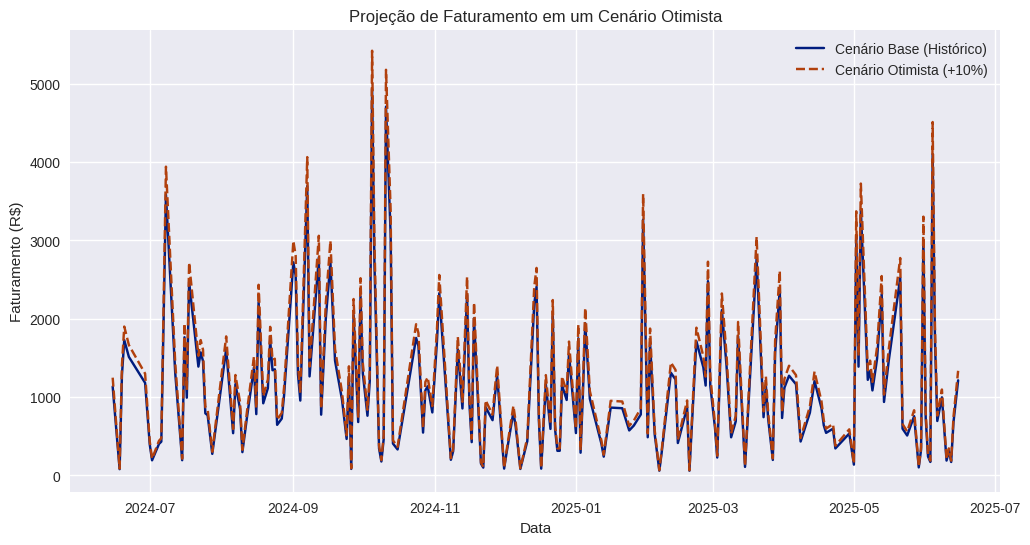

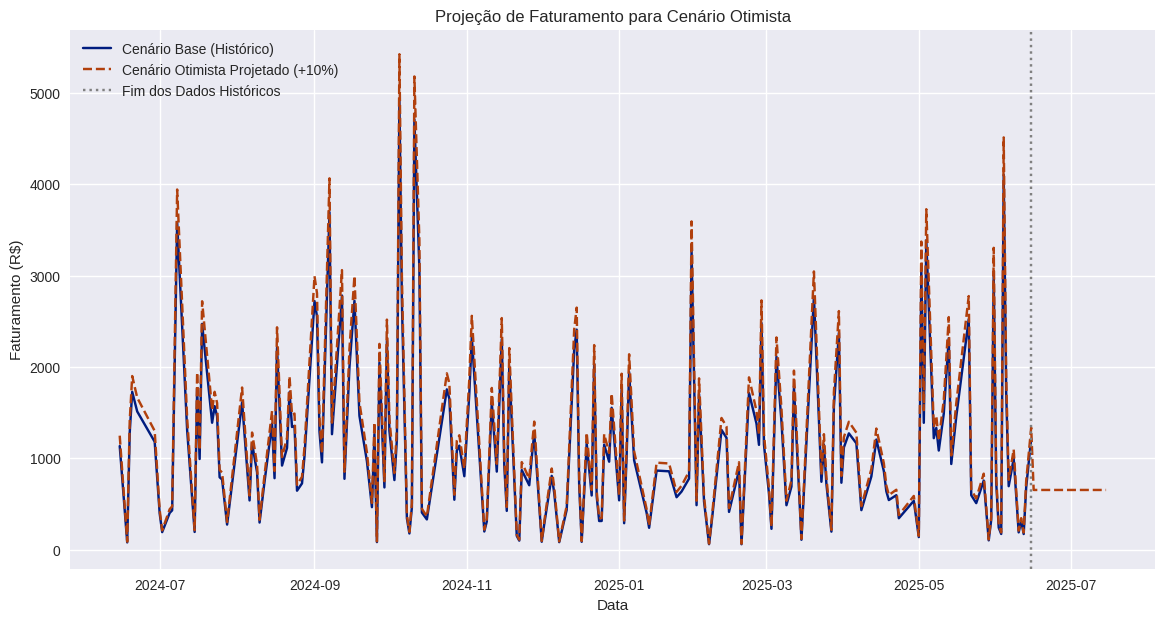

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
# Para projetar um cenário otimista, vamos assumir um crescimento percentual sobre o faturamento total ou faturamento diário.
# Podemos, por exemplo, projetar um crescimento de 10% em todas as vendas futuras.

# Calcular o faturamento diário base (do período histórico)
faturamento_diario_base = df.groupby('Data')['Total'].sum().reset_index()
faturamento_diario_base = faturamento_diario_base.rename(columns={'Data': 'ds', 'Total': 'y'})

# Definir o crescimento otimista (ex: 10%)
crescimento_otimista = 1.10 # Aumento de 10%

# Criar dados para o cenário otimista aplicando o crescimento ao faturamento base
faturamento_diario_otimista = faturamento_diario_base.copy()
faturamento_diario_otimista['y_otimista'] = faturamento_diario_otimista['y'] * crescimento_otimista

# Visualizar o cenário base vs. o cenário otimista
plt.figure(figsize=(12, 6))
plt.plot(faturamento_diario_base['ds'], faturamento_diario_base['y'], label='Cenário Base (Histórico)')
plt.plot(faturamento_diario_otimista['ds'], faturamento_diario_otimista['y_otimista'], label=f'Cenário Otimista (+{(crescimento_otimista-1)*100:.0f}%)', linestyle='--')
plt.title('Projeção de Faturamento em um Cenário Otimista')
plt.xlabel('Data')
plt.ylabel('Faturamento (R$)')
plt.legend()
plt.show()


ultimo_dia = faturamento_diario_otimista['ds'].max()
dias_para_projetar = 30 # Projetar 30 dias no futuro
dias_futuros = pd.date_range(start=ultimo_dia + pd.Timedelta(days=1), periods=dias_para_projetar, freq='D')


dias_media = 7 # Calcular a média dos últimos 7 dias
faturamento_medio_recente = faturamento_diario_base['y'].tail(dias_media).mean()

# Projetar os dias futuros com base na média recente e crescimento otimista
projecao_futura_otimista = pd.DataFrame({
    'ds': dias_futuros,
    'y_otimista': faturamento_medio_recente * crescimento_otimista
})

# Combinar os dados históricos otimistas com a projeção futura otimista
faturamento_cenario_otimista_completo = pd.concat([faturamento_diario_otimista[['ds', 'y_otimista']].rename(columns={'y_otimista': 'Total'}),
                                                 projecao_futura_otimista.rename(columns={'y_otimista': 'Total'})])

# Visualizar o cenário otimista (histórico + projeção)
plt.figure(figsize=(14, 7))
plt.plot(faturamento_diario_base['ds'], faturamento_diario_base['y'], label='Cenário Base (Histórico)')
plt.plot(faturamento_cenario_otimista_completo['ds'], faturamento_cenario_otimista_completo['Total'], label=f'Cenário Otimista Projetado (+{(crescimento_otimista-1)*100:.0f}%)', linestyle='--')
plt.axvline(x=ultimo_dia, color='gray', linestyle=':', label='Fim dos Dados Históricos')
plt.title('Projeção de Faturamento para Cenário Otimista')
plt.xlabel('Data')
plt.ylabel('Faturamento (R$)')
plt.legend()
plt.show()
